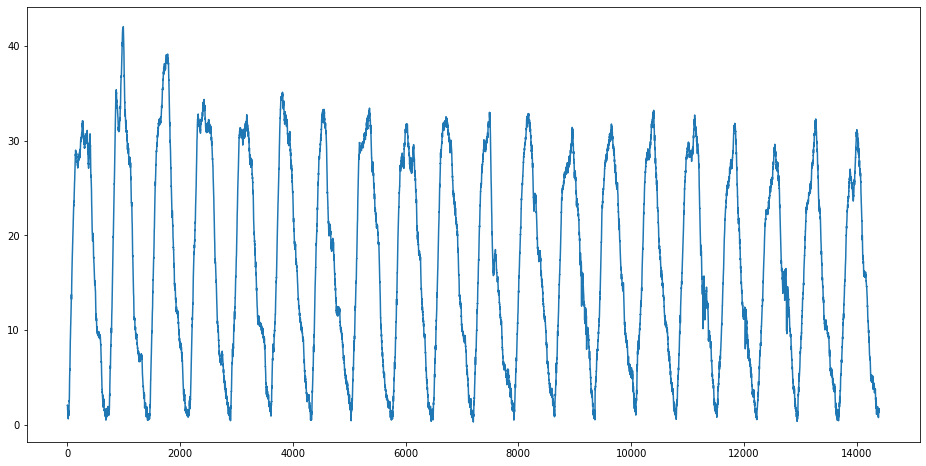

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Train_TEC_mar17.csv')
df.drop(["Date", "Year", "Month", "LT", "Time"], inplace = True, axis = 1)
plt.figure(figsize=(16,8))
plt.plot(df['TEC'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['TEC'])
for i in range(0,len(data)):
    new_data['TEC'][i] = data['TEC'][i]
dataset = new_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
train= scaled_data[:int(df.shape[0]*0.8)]
valid = scaled_data[int(df.shape[0]*0.8):]

x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(60,train.shape[0]):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])

for z in range(60,valid.shape[0]):
    x_test.append(valid[z-60:z,0])
    y_test.append(valid[z,0])

x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Using TensorFlow backend.


Train on 11460 samples, validate on 2820 samples
Epoch 1/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0160 - val_loss: 8.1173e-04
Epoch 2/50
11460/11460 [==============================] - 14s 1ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 3/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0036 - val_loss: 3.9753e-04
Epoch 4/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 5/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0033 - val_loss: 2.6656e-04
Epoch 6/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0036 - val_loss: 2.9232e-04
Epoch 7/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0031 - val_loss: 2.4600e-04
Epoch 8/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0028 - val_loss: 2.1189e-04
Epoch 9/50
11460/11460 [==============================] - 15s 1ms/step - loss: 0.0024 -

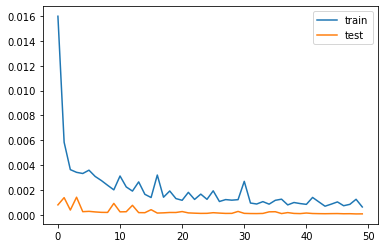

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(1))
ADAM = Adam(0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=ADAM)
history = model.fit(x_train,y_train,epochs=50,batch_size=72,validation_data=(x_test,y_test),verbose=1,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()